#**Analisis exploratorio de datos**

In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
import matplotlib.pyplot
matplotlib.pyplot
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_bh = pd.read_csv("/content/drive/MyDrive/TFM/Data/Bad Hell_nina.12.02.22sav.csv", sep=";")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,76,86,89,90,91) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df_bh.head()

,Studiennummer,date_t1,date_t2,rehab_days,rehab_weeks,rehab_weeks_4_6,birthdate,age,sex,diagnoses,...,Diff_executive,ZDiff_attention,ZDiff_verbal,ZDiff_executive,NZDiff_a,NZDiff_v,NZDiff_e,RZDiff_a,RZDiff_v,RZDiff_e
0,1,4/13/2015,5/21/2015,38,5,2,01.02.1959,"56,28",2,"F32, I44 E66 E79",...,"0,266077166","0,119883798","-0,079301924","0,158280274","0,542971112","0,242216462","0,072732357",1034,872,776
1,2,4/13/2015,5/21/2015,38,5,2,06.03.1984,"30,86",1,"F13, F43",...,"-4,73997021","-2,469434413","2,070554691","-2,796729849","-1,585812035","1,649176822","-2,416072213",83,1391,12
2,3,4/13/2015,5/19/2015,36,5,2,6/14/1965,"49,83",2,"F33, R73",...,"0,263228604","0,114158468","-0,078162839","0,156598802","-0,573001199","0,611800353","-0,276191362",415,1068,574
3,4,4/13/2015,5/21/2015,38,5,2,8/31/1960,"54,62",2,"F32,",...,"0,263742855","0,118647521","-0,079174234","0,156902358","0,326083868","0,290149351","-0,191817194",919,899,622
4,5,4/13/2015,5/21/2015,38,5,2,2/18/1943,"72,15",1,"F32, I10 R55 I48 G43 M15",...,"-4,72272734","-2,471161176","2,070514367","-2,786551588","-1,697818427","1,642538429","-1,497053786",66,1390,99


In [5]:
print('Cantidad de Filas y columnas:',df_bh.shape)
print('Nombre columnas:',df_bh.columns)

Cantidad de Filas y columnas: (1521, 651)
Nombre columnas: Index(['Studiennummer', 'date_t1', 'date_t2', 'rehab_days', 'rehab_weeks',
       'rehab_weeks_4_6', 'birthdate', 'age', 'sex', 'diagnoses',
       ...
       'Diff_executive', 'ZDiff_attention', 'ZDiff_verbal', 'ZDiff_executive',
       'NZDiff_a', 'NZDiff_v', 'NZDiff_e', 'RZDiff_a', 'RZDiff_v', 'RZDiff_e'],
      dtype='object', length=651)


In [6]:
df_bh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Columns: 651 entries, Studiennummer to RZDiff_e
dtypes: float64(3), int64(3), object(645)
memory usage: 7.6+ MB


In [7]:
df_bh.describe

<bound method NDFrame.describe of       Studiennummer    date_t1    date_t2 rehab_days rehab_weeks  \
0                 1  4/13/2015  5/21/2015         38           5   
1                 2  4/13/2015  5/21/2015         38           5   
2                 3  4/13/2015  5/19/2015         36           5   
3                 4  4/13/2015  5/21/2015         38           5   
4                 5  4/13/2015  5/21/2015         38           5   
...             ...        ...        ...        ...         ...   
1516           1517  2/22/2017                                     
1517           1518  2/23/2017                                     
1518           1519  2/23/2017                                     
1519           1520  2/23/2017                                     
1520           1521  2/23/2017                                     

     rehab_weeks_4_6   birthdate    age  sex  \
0                  2  01.02.1959  56,28    2   
1                  2  06.03.1984  30,86    1   
2    

In [8]:
df_bh.dtypes

Studiennummer     int64
date_t1          object
date_t2          object
rehab_days       object
rehab_weeks      object
                  ...  
NZDiff_v         object
NZDiff_e         object
RZDiff_a         object
RZDiff_v         object
RZDiff_e         object
Length: 651, dtype: object

### Verificando NaN

In [12]:
missing_data = df_bh.isnull()
missing_data.head(5)

,Studiennummer,date_t1,date_t2,rehab_days,rehab_weeks,rehab_weeks_4_6,birthdate,age,sex,diagnoses,...,Diff_executive,ZDiff_attention,ZDiff_verbal,ZDiff_executive,NZDiff_a,NZDiff_v,NZDiff_e,RZDiff_a,RZDiff_v,RZDiff_e
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Studiennummer
False    1521
Name: Studiennummer, dtype: int64

date_t1
False    1521
Name: date_t1, dtype: int64

date_t2
False    1521
Name: date_t2, dtype: int64

rehab_days
False    1521
Name: rehab_days, dtype: int64

rehab_weeks
False    1521
Name: rehab_weeks, dtype: int64

rehab_weeks_4_6
False    1521
Name: rehab_weeks_4_6, dtype: int64

birthdate
False    1521
Name: birthdate, dtype: int64

age
False    1521
Name: age, dtype: int64

sex
False    1521
Name: sex, dtype: int64

diagnoses
False    1521
Name: diagnoses, dtype: int64

group
False    1519
True        2
Name: group, dtype: int64

group_affective
False    1519
True        2
Name: group_affective, dtype: int64

group_unipolar
False    1519
True        2
Name: group_unipolar, dtype: int64

height_cm
False    1521
Name: height_cm, dtype: int64

height_m
False    1521
Name: height_m, dtype: int64

weight
False    1521
Name: weight, dtype: int64

BMI_T1
False    1521
Name: BMI_T1, dtype: int64

BMI_T2
False    1521
Name: BM

In [14]:
df_bh.isna().sum().sort_values()

Studiennummer      0
CHO364_t2          0
HDL365_t2          0
LDL366_t2          0
TG367_t2           0
                  ..
PSSI_ZW_t1R        0
PSSI_ZW_t1N        0
group_unipolar     2
group_affective    2
group              2
Length: 651, dtype: int64

In [15]:
total = df_bh.isnull().sum().sort_values(ascending = False)
percent = (df_bh.isnull().sum() / df_bh.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
group_affective,2,0.001315
group_unipolar,2,0.001315
group,2,0.001315
HDL365_t2,0,0.000000
LDL366_t2,0,0.000000
TG367_t2,0,0.000000
CHR374_t2,0,0.000000
NHD375_t2,0,0.000000
NA376_t2,0,0.000000
K377_t2,0,0.000000


### Tratamiento de NaN, eliminando las filas que contienen NaN

In [16]:
df_bh.dropna(subset=['group_affective'], axis=0, inplace=True)

In [17]:
df_bh.dropna(subset=['group_unipolar'], axis=0, inplace=True)

In [18]:
df_bh.dropna(subset=['group'], axis=0, inplace=True)

In [19]:
total = df_bh.isnull().sum().sort_values(ascending = False)
percent = (df_bh.isnull().sum() / df_bh.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Studiennummer,0,0.0
pH412_t2,0,0.0
CHO364_t2,0,0.0
HDL365_t2,0,0.0
LDL366_t2,0,0.0
TG367_t2,0,0.0
CHR374_t2,0,0.0
NHD375_t2,0,0.0
NA376_t2,0,0.0
K377_t2,0,0.0


In [ ]:
# Tratamiento de datos faltantes:
# eliminar Nas
#df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
#df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
#df_train.isnull().sum().max() # Para comprobar que no hay más datos desaparecidos.

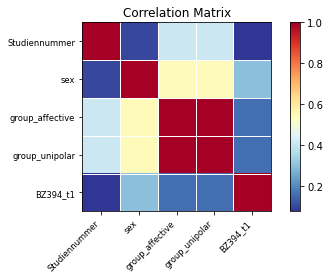

In [ ]:
corr = df_bh.set_index('group').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [20]:
#Cambio de tipo de datos variables psych_onset, number_treatments
# la variable number_treatments contiene espacios vacios los reemplazo con 0
df_bh['number_treatments'] = df_bh['number_treatments'].str.replace(" ", "0")

In [21]:
df_bh['number_treatments'] = df_bh['number_treatments'].astype('int')

In [22]:
#Cambio de tipo de datos variables psych_onset, number_treatments
# la variable number_treatments contiene espacios vacios los reemplazo con 0
df_bh['psych_onset'] = df_bh['psych_onset'].str.replace(" ", "0")

In [23]:
df_bh['psych_onset'] = df_bh['psych_onset'].astype('int')

In [24]:
print("Mostrar una sola columna del dataframe[]") 
print(df_bh['psych_onset']) 

Mostrar una sola columna del dataframe[]
0       55
1       24
2       48
3       53
4       71
        ..
1516    20
1517     0
1518    52
1519    35
1520     0
Name: psych_onset, Length: 1519, dtype: int64


In [25]:
print("Mostrar una sola columna del dataframe[]") 
print(df_bh['number_treatments']) 

Mostrar una sola columna del dataframe[]
0       0
1       0
2       1
3       0
4       0
       ..
1516    2
1517    0
1518    0
1519    0
1520    0
Name: number_treatments, Length: 1519, dtype: int64


In [26]:
df_bh['number_treatments'].describe()

count    1519.000000
mean      487.691244
std      2153.105580
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max      9999.000000
Name: number_treatments, dtype: float64

In [27]:
df_bh['psych_onset'].describe()

count    1519.000000
mean      519.273864
std      2147.248837
min         0.000000
25%        14.000000
50%        39.000000
75%        50.000000
max      9999.000000
Name: psych_onset, dtype: float64

##Correlación entre variables

Variables importantes:


*   psych_onset
*   number_treatments




In [28]:
# Matriz de correlación
# ==============================================================================
corr_matrix = df_bh.corr(method='pearson')
corr_matrix

,Studiennummer,sex,group,group_affective,group_unipolar,number_treatments,psych_onset,BZ394_t1
Studiennummer,1.000000,0.103310,0.407924,0.407952,0.407952,0.103251,0.103416,0.075238
sex,0.103310,1.000000,0.545556,0.545556,0.545556,1.000000,0.999398,0.299876
group,0.407924,0.545556,1.000000,1.000000,1.000000,0.545542,0.544548,0.160395
group_affective,0.407952,0.545556,1.000000,1.000000,1.000000,0.545542,0.544548,0.160400
group_unipolar,0.407952,0.545556,1.000000,1.000000,1.000000,0.545542,0.544548,0.160401
number_treatments,0.103251,1.000000,0.545542,0.545542,0.545542,1.000000,0.999397,0.299875
psych_onset,0.103416,0.999398,0.544548,0.544548,0.544548,0.999397,1.000000,0.299410
BZ394_t1,0.075238,0.299876,0.160395,0.160400,0.160401,0.299875,0.299410,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


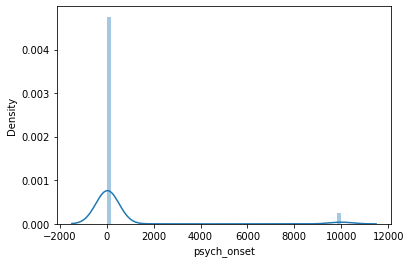

In [ ]:
sns.distplot(df_bh['psych_onset'])

In [34]:
# variables numericas
datos = df_bh.select_dtypes(include=['float64', 'int'])
datos.head(10)

,Studiennummer,sex,group,group_affective,group_unipolar,number_treatments,psych_onset,BZ394_t1
0,1,2,1.0,1.0,1.0,0,55,95
1,2,1,3.0,0.0,0.0,0,24,87
2,3,2,1.0,1.0,1.0,1,48,106
3,4,2,1.0,1.0,1.0,0,53,88
4,5,1,1.0,1.0,1.0,0,71,98
5,6,2,3.0,0.0,0.0,0,40,107
6,7,1,1.0,1.0,1.0,0,49,99
7,8,1,3.0,0.0,0.0,0,40,140
8,9,1,3.0,0.0,0.0,0,0,69
9,10,1,1.0,1.0,1.0,1,0,97


In [35]:
datos.dtypes

Studiennummer          int64
sex                    int64
group                float64
group_affective      float64
group_unipolar       float64
number_treatments      int64
psych_onset            int64
BZ394_t1               int64
dtype: object

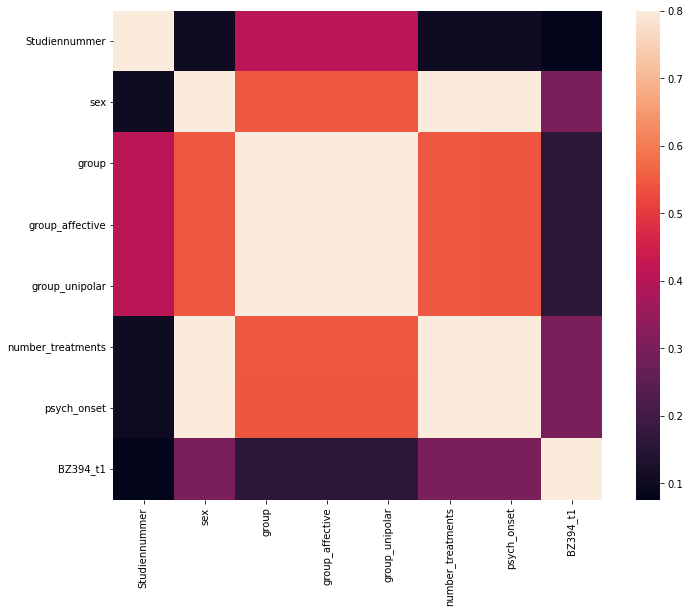

In [37]:
corrmat = df_bh.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

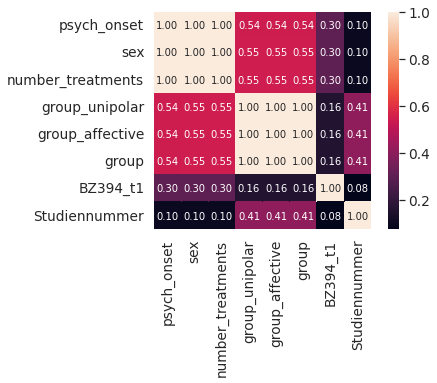

In [39]:
# Matriz de correlación
k = 10 # Número de variables.
cols = corrmat.nlargest(k, 'psych_onset')['psych_onset'].index
cm = np.corrcoef(df_bh[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [40]:
corr = df_bh.corr()
corr[['psych_onset']].sort_values(by = 'psych_onset',ascending = False).style.background_gradient()

,psych_onset
psych_onset,1.000000
sex,0.999398
number_treatments,0.999397
group_unipolar,0.544548
group_affective,0.544548
group,0.544548
BZ394_t1,0.299410
Studiennummer,0.103416


In [41]:
corr = df_bh.corr()
corr[['number_treatments']].sort_values(by = 'number_treatments',ascending = False).style.background_gradient()

,number_treatments
number_treatments,1.000000
sex,1.000000
psych_onset,0.999397
group_affective,0.545542
group_unipolar,0.545542
group,0.545542
BZ394_t1,0.299875
Studiennummer,0.103251


In [29]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df_bh.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
28,group_affective,group_unipolar,1.000000,1.000000
35,group_unipolar,group_affective,1.000000,1.000000
26,group_affective,group,1.000000,1.000000
19,group,group_affective,1.000000,1.000000
34,group_unipolar,group,1.000000,1.000000
20,group,group_unipolar,1.000000,1.000000
13,sex,number_treatments,1.000000,1.000000
41,number_treatments,sex,1.000000,1.000000
14,sex,psych_onset,0.999398,0.999398
49,psych_onset,sex,0.999398,0.999398


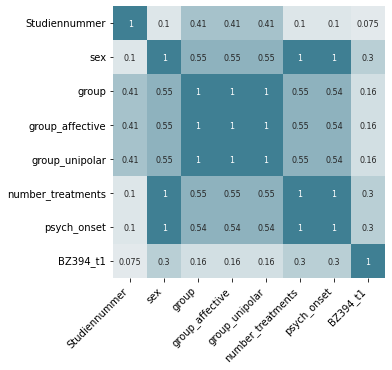

In [30]:
# Heatmap matriz de correlaciones

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

El análisis inicial entre correlaciones de variables muestra una alta correlacion entre las variables `psych_onset, sex, number_treatments`.

Entre estas tres variables la correlación es la mas alta lo que indica la aparición de las primeras enfermedades psiquiátricas (edad en años) de la variable psych_onset y el género el cual de acuerdo a la correalación es determinante con la aparición de los primeros síntomas y número de tratamientos a tiempo parcial en régimen de internado que también supone una alta relación con el género. Las variables `group_unipolar` y `group_affective` también son importantes en la matriz, estas variables indican trastornos depresivos unipolares.

Un modelo de regresión logística trata de modelar la probabilidad de una variable cualitativa en función de una o más variables independientes.

In [45]:
# Asimetría y curtosis:

print("Skewness: %f" % df_bh['number_treatments'].skew())
print("Kurtosis: %f" % df_bh['psych_onset'].kurt())

Skewness: 4.196783
Kurtosis: 15.589121
